<a href="https://colab.research.google.com/github/nicolenahyun/Section1_project/blob/main/n231-choose-your-ml-problems/n231a-choose-your-ml-problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
- **(객관식) 다음 중 설명이 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    - 특성 3개를 사용해 가장 성능이 좋은 모델 A를 만들고 또 특성 5개를 사용해 최적의 모델 B를 학습하였습니다. 이때 모델 A에서 선택된 특성은 A1, A2, A3 입니다.
    1. 최적의 모델 B에는 특성 A1, A2, A3가 항상 선택됩니다.
    2. 최적의 모델 B 학습시 특성 A1, A2, A3는 전혀 사용되지 않습니다.
    3. 최적의 모델 B에 특성 A1, A2, A3가 선택될지 알 수 없습니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving redwine_quality.csv to redwine_quality.csv


In [3]:
import io
df =pd.read_csv(io.StringIO(uploaded['redwine_quality.csv'].decode('utf-8', 'ignore')))

## Exploratory Data Analysis
### 1) Using Manual Method

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().values.any()

### 결측치 없음

False

## Ploting Count for Qualities

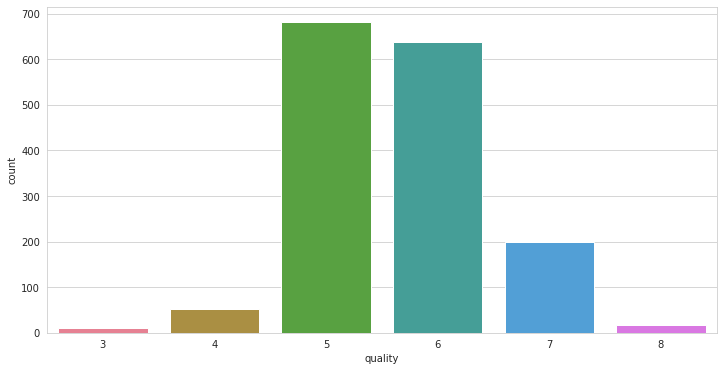

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=df, palette='husl');

## Finding Correlation among the variables

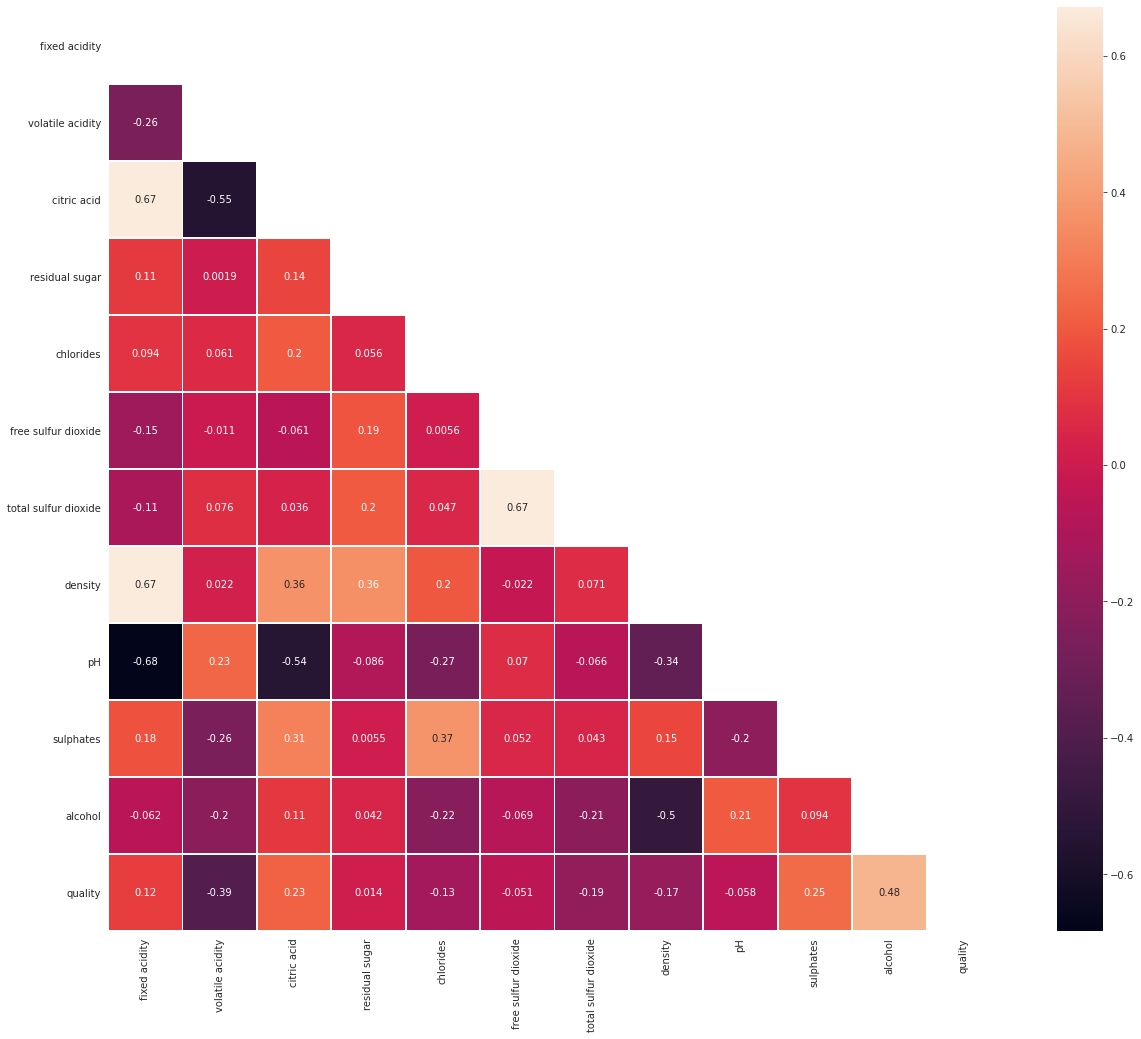

In [13]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

### pH와 fixed acidity / citric acid와 volatile acidity / citric acid와 pH -> high correlation

## Visualising Numerical Data

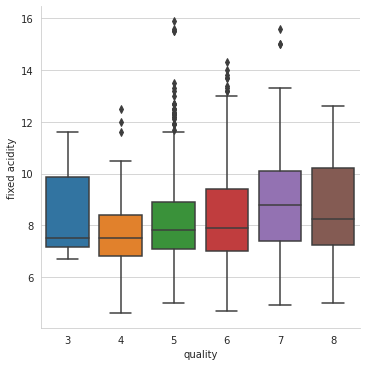

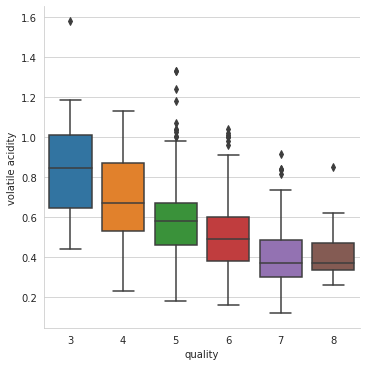

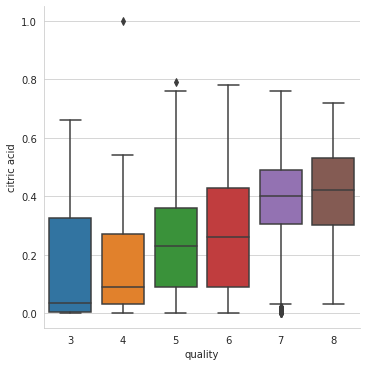

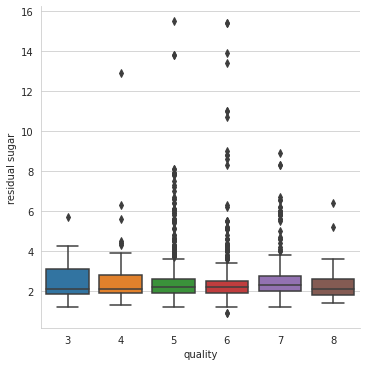

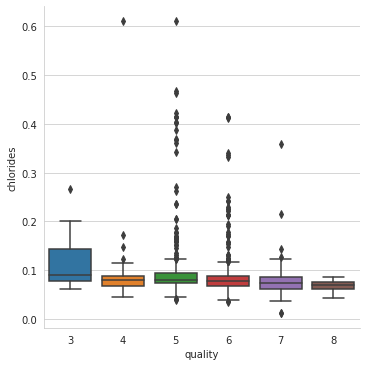

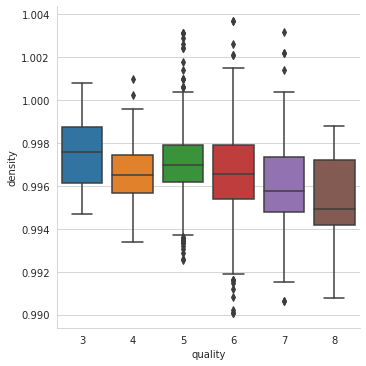

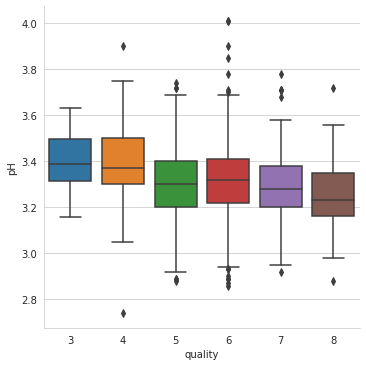

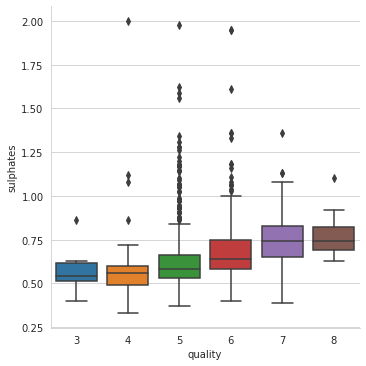

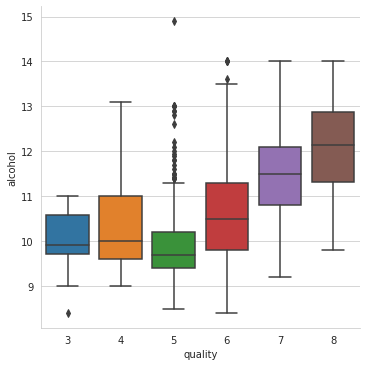

In [15]:
sns.catplot(x="quality", y="fixed acidity", data=df, kind="box")
sns.catplot(x="quality", y="volatile acidity", data=df, kind="box")
sns.catplot(x="quality", y="citric acid", data=df, kind="box")
sns.catplot(x="quality", y="residual sugar", data=df, kind="box")
sns.catplot(x="quality", y="chlorides", data=df, kind="box")
sns.catplot(x="quality", y="density", data=df, kind="box")
sns.catplot(x="quality", y="pH", data=df, kind="box")
sns.catplot(x="quality", y="sulphates", data=df, kind="box")
sns.catplot(x="quality", y="alcohol", data=df, kind="box");

## Acidity Type with Different Qualities of Wine

In [16]:
acidity_count = df['fixed acidity'].value_counts().reset_index()
acidity_count

,index,fixed acidity
0,7.2,67
1,7.1,57
2,7.8,53
3,7.5,52
4,7.0,50
...,...,...
91,13.4,1
92,14.0,1
93,5.5,1
94,4.6,1


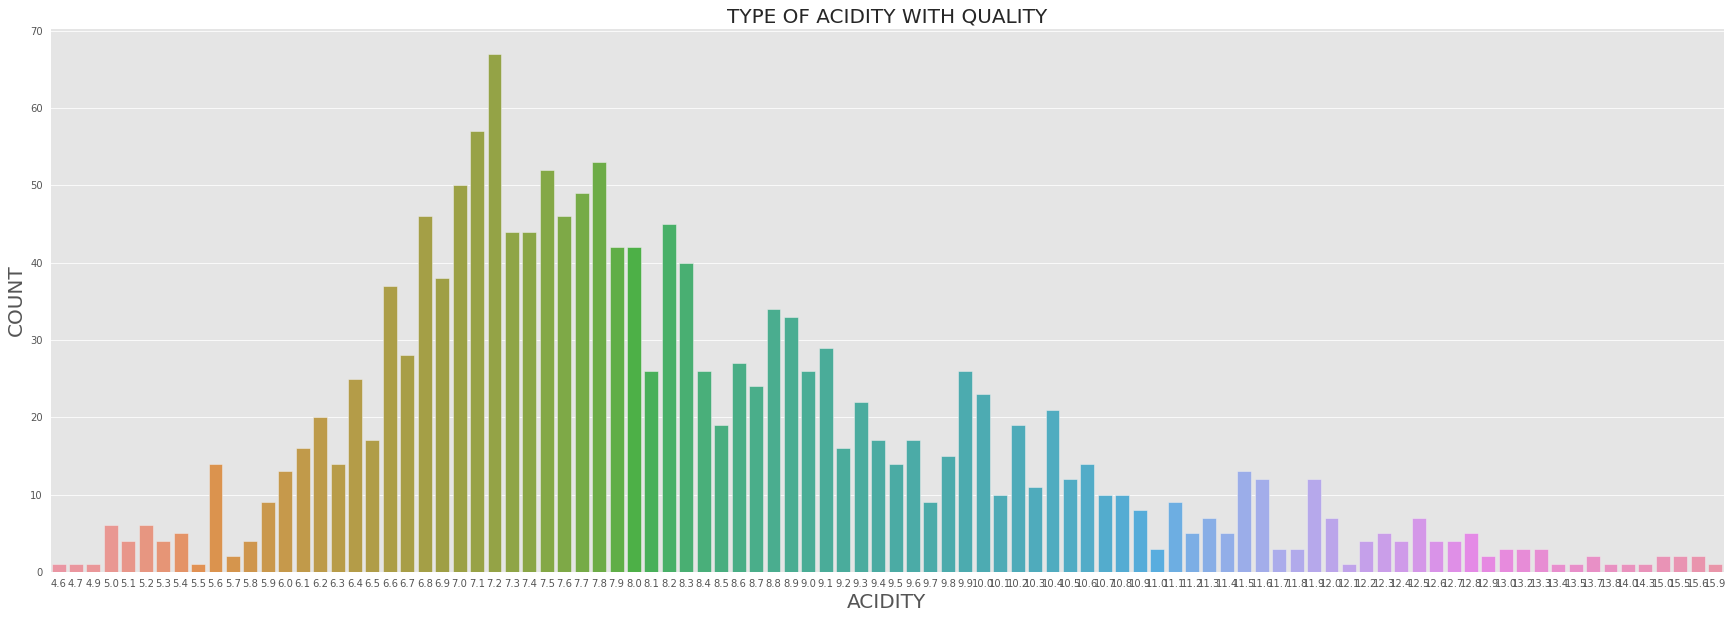

In [17]:
plt.figure(figsize=(30, 10))
plt.style.use("ggplot")
sns.barplot(x=acidity_count["index"], y=acidity_count["fixed acidity"])
plt.title("TYPE OF ACIDITY WITH QUALITY", fontsize=20)
plt.xlabel("ACIDITY", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

## Distribution of pH with Different Qualities of Wine

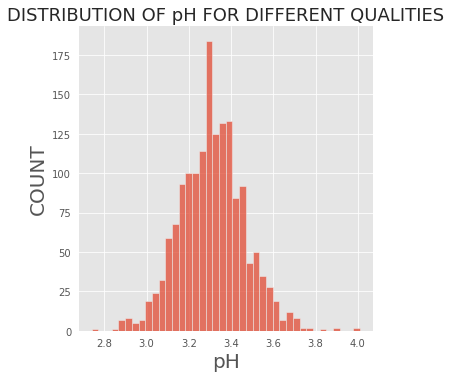

In [19]:
plt.style.use("ggplot")
sns.displot(df["pH"]);  # using displot here
plt.title("DISTRIBUTION OF pH FOR DIFFERENT QUALITIES", fontsize=18)
plt.xlabel("pH", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

## Skewness Correction

In [20]:
def skewnessCorrector(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(df[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(df[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df[columnName], plot=plt)
    plt.show();
    df[columnName], lam_fixed_acidity = boxcox(
        df[columnName])
    print('''After Correcting''')
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    sns.distplot(df[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(df[columnName], plot = plt)
    plt.show();

Before Correcting
Mu before correcting FIXED ACIDITY : 8.31963727329581, Sigma before correcting FIXED ACIDITY : 1.7405518001102729


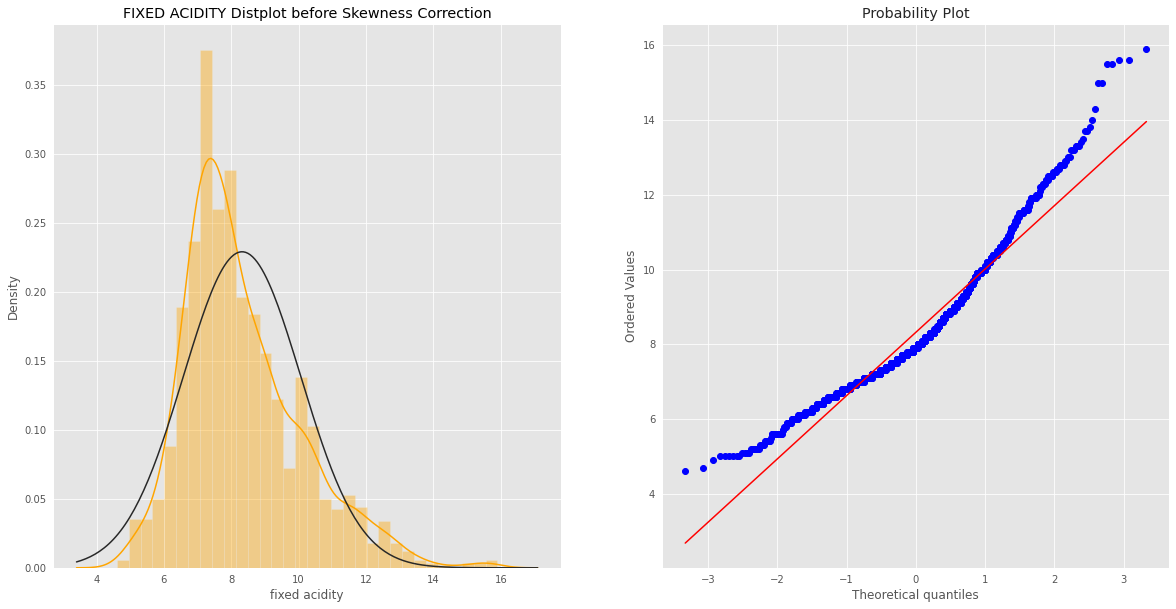

After Correcting
Mu after correcting FIXED ACIDITY : 8.31963727329581, Sigma after correcting FIXED ACIDITY : 1.7405518001102729


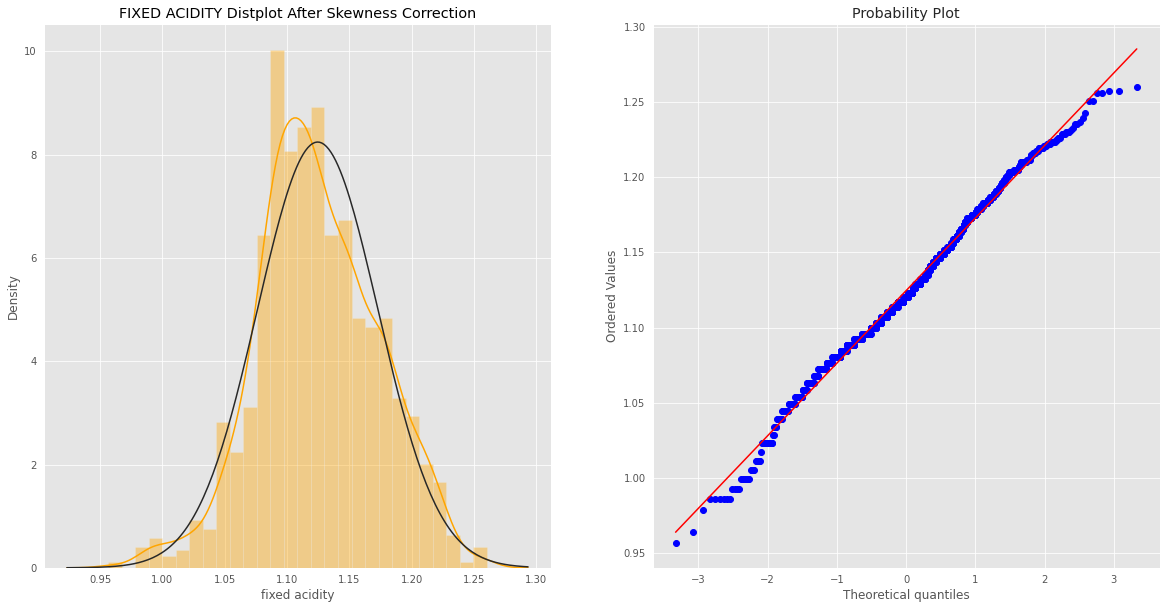

Before Correcting
Mu before correcting RESIDUAL SUGAR : 2.53880550343965, Sigma before correcting RESIDUAL SUGAR : 1.4094871124880495


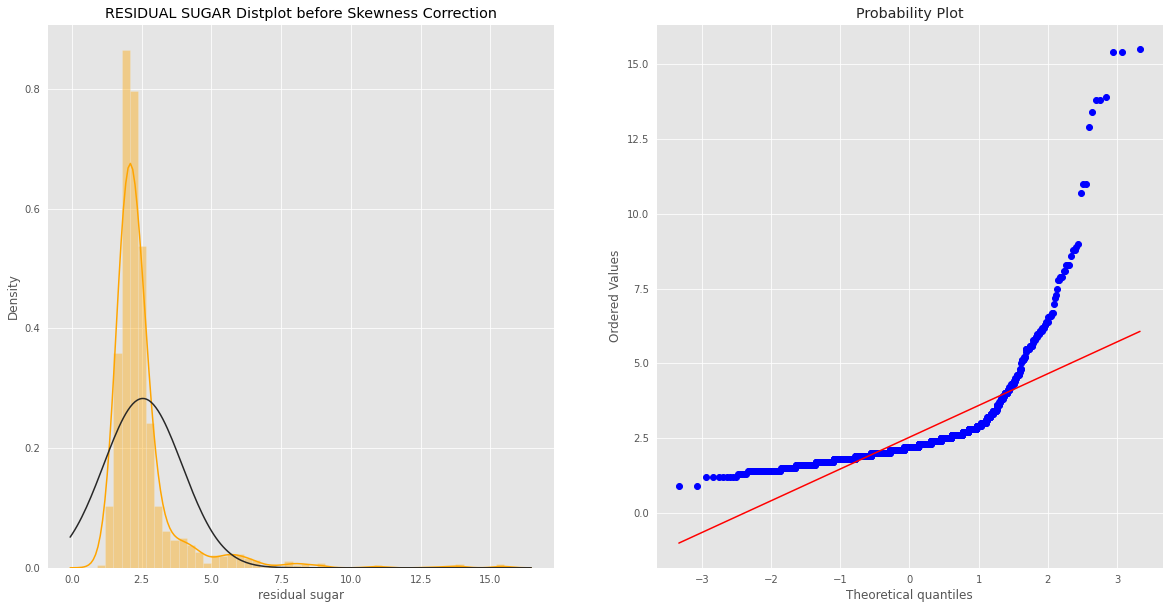

After Correcting
Mu after correcting RESIDUAL SUGAR : 2.53880550343965, Sigma after correcting RESIDUAL SUGAR : 1.4094871124880495


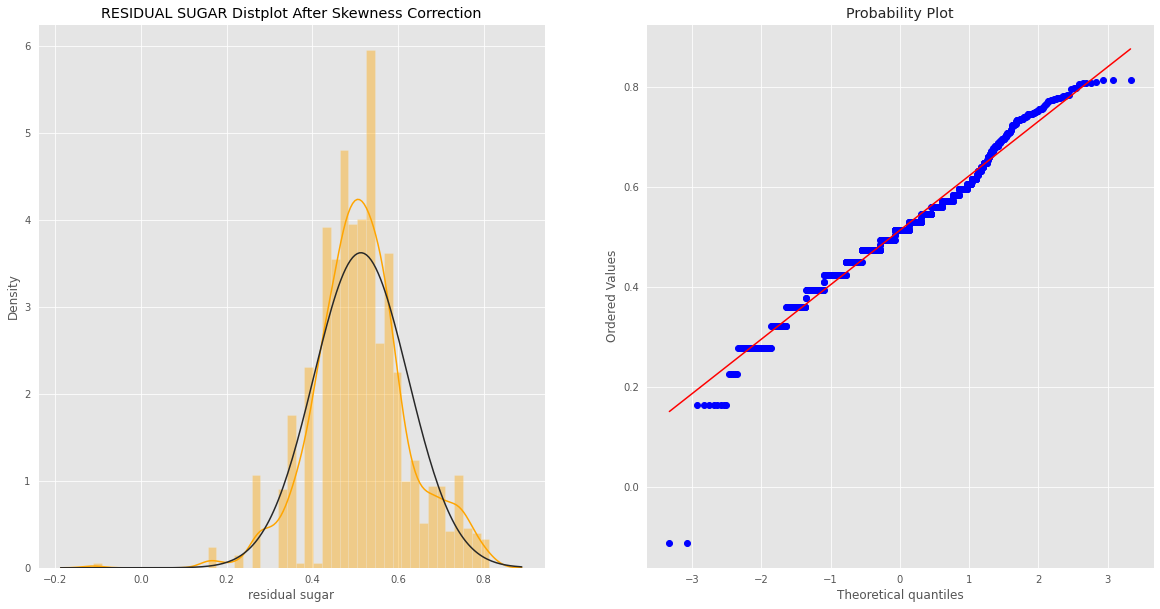

Before Correcting
Mu before correcting FREE SULFUR DIOXIDE : 15.874921826141339, Sigma before correcting FREE SULFUR DIOXIDE : 10.45688561493072


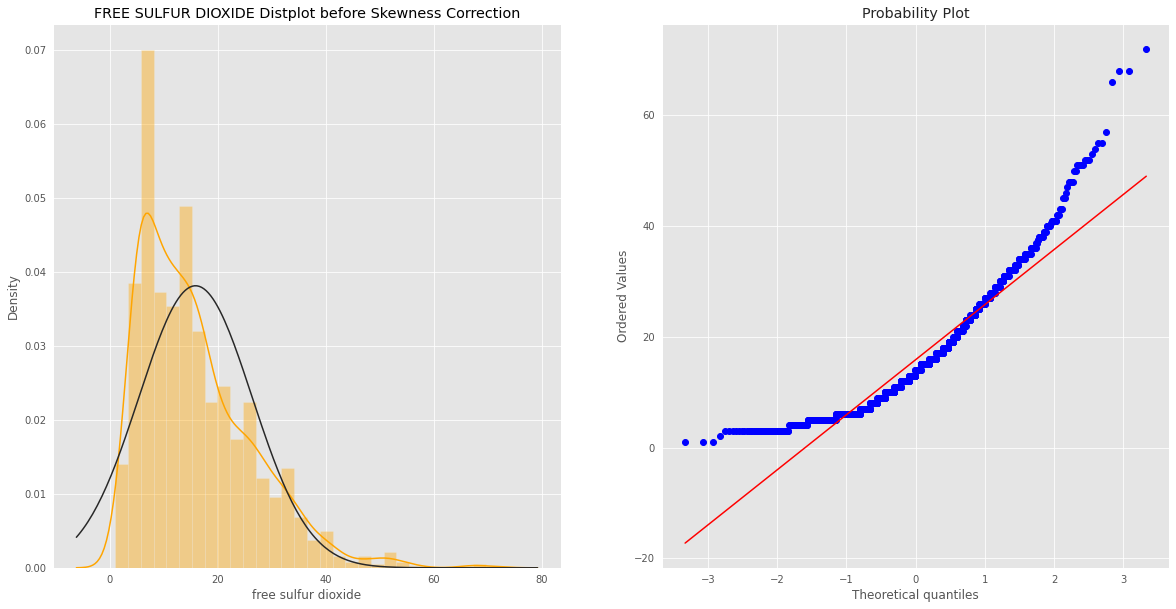

After Correcting
Mu after correcting FREE SULFUR DIOXIDE : 15.874921826141339, Sigma after correcting FREE SULFUR DIOXIDE : 10.45688561493072


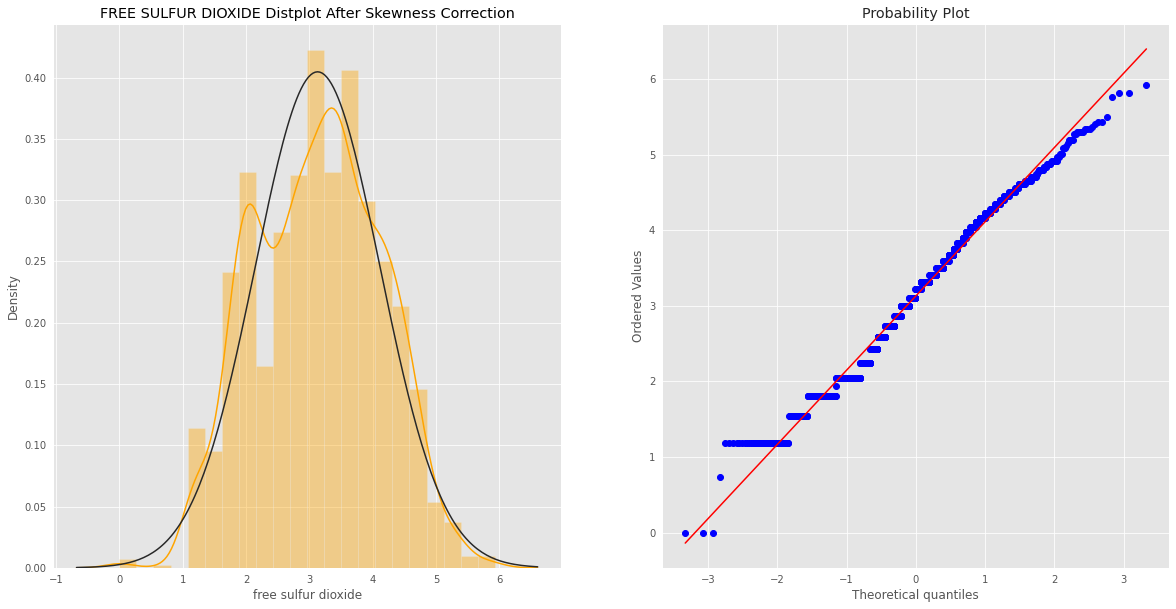

Before Correcting
Mu before correcting TOTAL SULFUR DIOXIDE : 46.46779237023139, Sigma before correcting TOTAL SULFUR DIOXIDE : 32.88503665178374


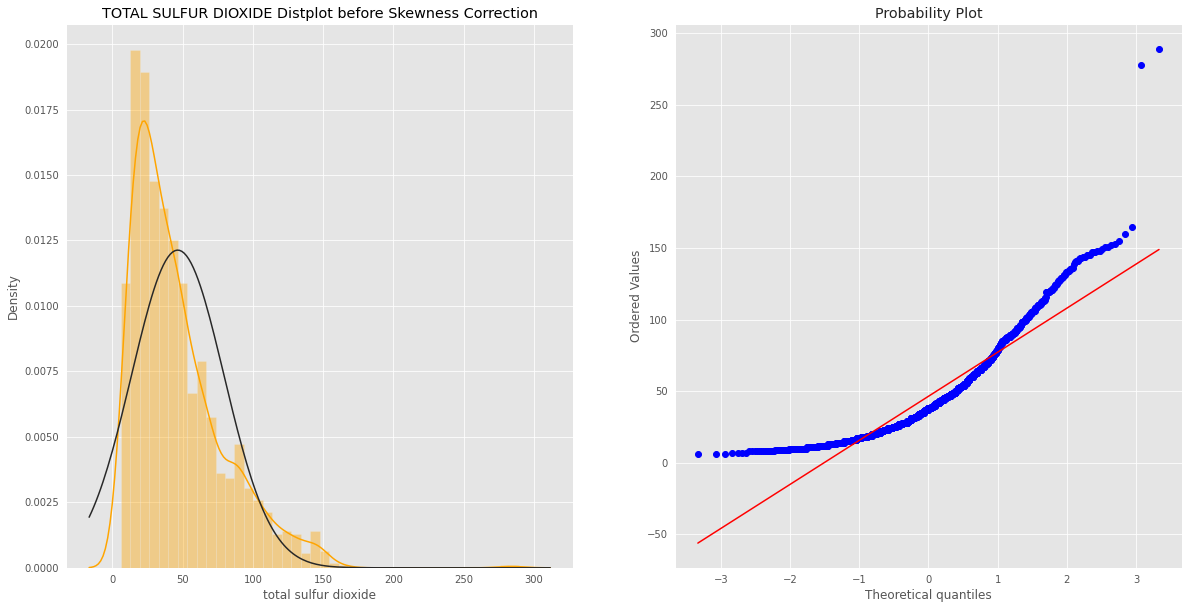

After Correcting
Mu after correcting TOTAL SULFUR DIOXIDE : 46.46779237023139, Sigma after correcting TOTAL SULFUR DIOXIDE : 32.88503665178374


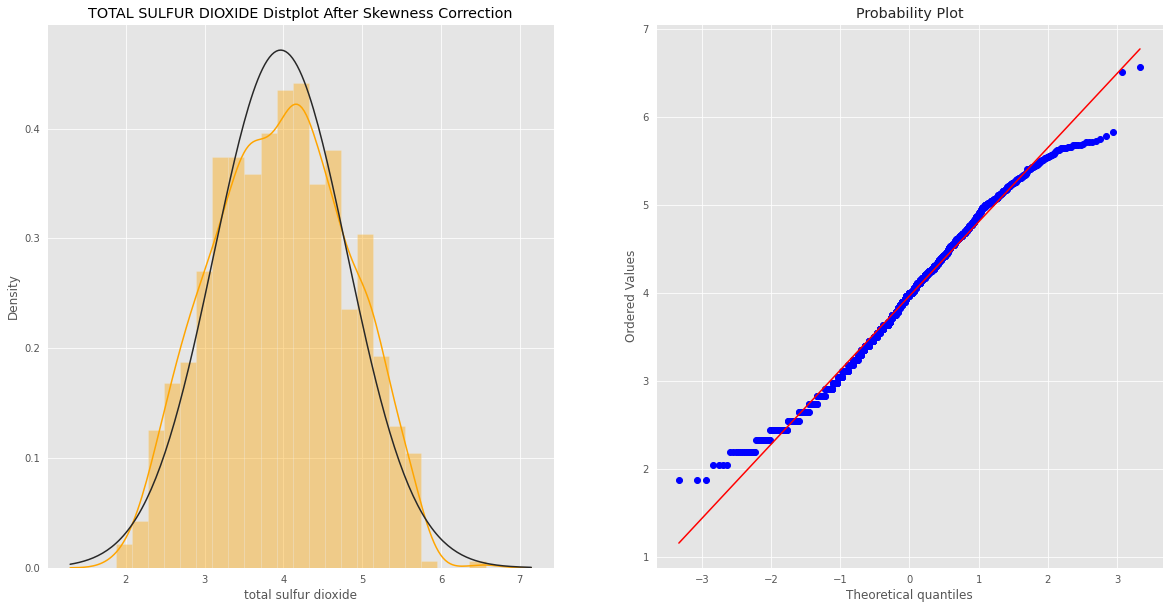

Before Correcting
Mu before correcting SULPHATES : 0.6581488430268917, Sigma before correcting SULPHATES : 0.16945396724179546


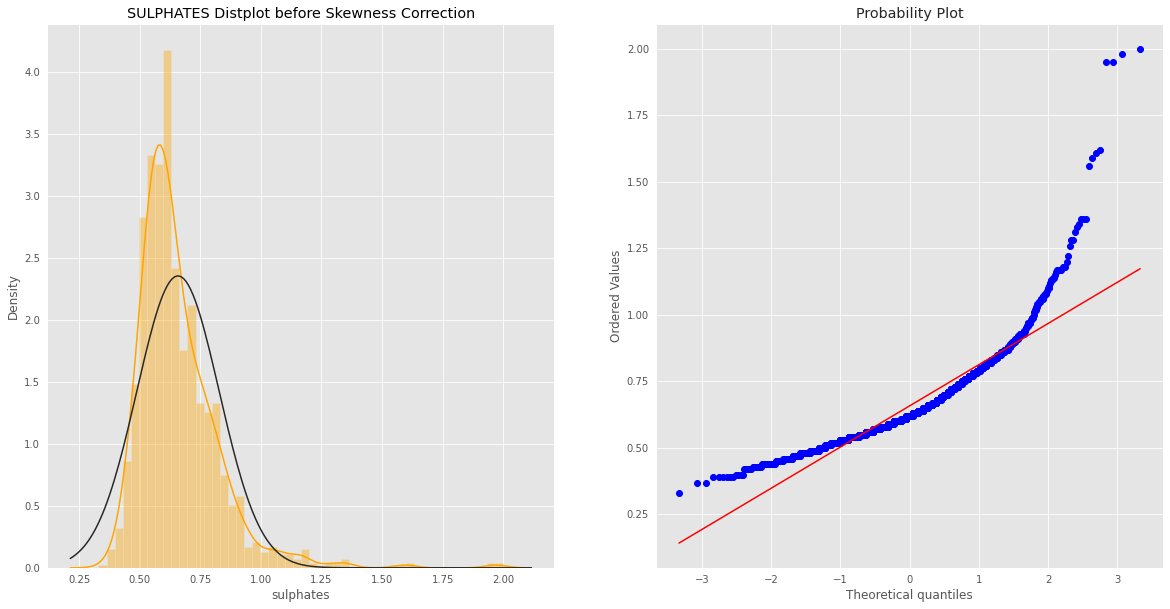

After Correcting
Mu after correcting SULPHATES : 0.6581488430268917, Sigma after correcting SULPHATES : 0.16945396724179546


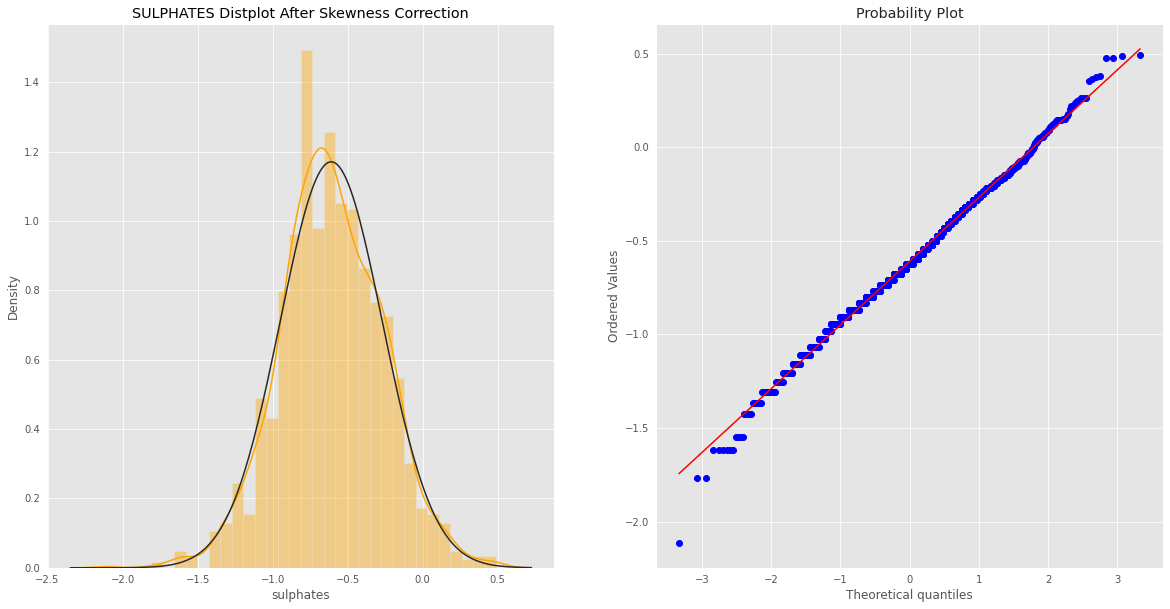

In [21]:
skewColumnList = [
    'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'
]
for columns in skewColumnList:
    skewnessCorrector(columns)

## Outlier Correction

In [22]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(df[column], 25)
        # 3st quartile
        Q3 = np.percentile(df[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[column] < Q1 - outlier_step)
                              | (df[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [23]:
print("number of outliers detected --> ",
      len(df.loc[detect_outliers(df.columns[:-1])]))

number of outliers detected -->  48


In [24]:
df.loc[detect_outliers(df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,0.054,2.427186,4.649352,0.99340,3.90,-0.801405,13.100000,4
94,0.985731,1.020,0.04,0.277689,0.045,4.920668,4.983161,0.99380,3.75,-1.111447,10.500000,4
95,0.964194,0.600,0.17,0.530233,0.058,3.504207,5.261323,0.99320,3.85,-0.678257,12.900000,6
442,1.257350,0.685,0.76,0.666360,0.100,2.046206,4.144017,1.00320,2.95,-0.476630,11.200000,7
553,0.985731,1.040,0.24,0.360736,0.050,4.503448,5.136097,0.99340,3.74,-0.622818,11.500000,5
554,1.256323,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
555,1.256323,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
557,1.257350,0.645,0.49,0.691490,0.095,2.733844,3.398654,1.00315,2.92,-0.354821,11.100000,5
588,0.985731,0.420,0.24,0.473382,0.060,3.673341,4.327250,0.99170,3.72,-0.354821,14.000000,8
652,1.260365,0.360,0.65,0.768664,0.096,3.900481,4.758716,0.99760,2.98,-0.191541,14.900000,5


In [25]:
# outlier 제거하기
df = df.drop(detect_outliers(df.columns[:-1]),axis = 0).reset_index(drop = True)

## Data Preprocessing

In [31]:
# quality value가 6 이하면, class 0으로 분류
# quality value가 6 초과면, class 1로 분류

df['quality'] = np.where(df['quality'] > 6, 1, 0)
df['quality'].value_counts()

0    1345
1     206
Name: quality, dtype: int64

In [32]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [33]:
X

array([[ 1.10330574,  0.7       ,  0.        , ...,  3.51      ,
        -0.80140519,  9.4       ],
       [ 1.11687459,  0.88      ,  0.        , ...,  3.2       ,
        -0.47663041,  9.8       ],
       [ 1.11687459,  0.76      ,  0.04      , ...,  3.26      ,
        -0.54624593,  9.8       ],
       ...,
       [ 1.05873705,  0.51      ,  0.13      , ...,  3.42      ,
        -0.33647043, 11.        ],
       [ 1.03914895,  0.645     ,  0.12      , ...,  3.57      ,
        -0.41307232, 10.2       ],
       [ 1.0442499 ,  0.31      ,  0.47      , ...,  3.39      ,
        -0.52231564, 11.        ]])

In [34]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
X.shape

(1551, 11)

In [37]:
y.shape

(1551,)

In [ ]:
# 정답 1번

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
- **(객관식) 다음 설명 중 가장 틀린 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. 특정한 종목의 다음날 주식 종가를 예측하는 문제는 Supervised Learning 문제이다.
    2. 다음날 KOSPI 지수가 증가할지 감소할지 예측하는 문제는 Classification 문제이다.
    3. 축구 경기 도중에 승패를 예측하는 모델을 만들기 위해서는 실시간 통계 정보와 경기마다 승패 데이터가 필요하다.
    4. 이번 시즌 토트넘 선수들의 개인 통계 데이터(슛, 도움, ...)를 사용해서 다음 토트넘 경기의 승패를 예측할 수 있다.
   

In [ ]:
# 정답 2번 
### df['quality'] 으로 타겟 값이 0,1로 나뉘므로 분류 문제라고 볼 수 있다 

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.
- **(객관식) 같은 데이터로 스팸을 예측하는 모델 A와 B를 만들었습니다. 다음 설명 중 가장 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. A의 재현율은 80%이고 B의 재현율은 60%일 때 A가 더 좋은 모델이다.
    2. A의 정밀도는 80%이고 B의 정밀도는 60%일 때 A가 더 좋은 모델이다.
    3. A는 B보다 정밀도는 높지만 재현율은 낮다. A가 더 좋은 모델이다.
    4. A는 B보다 재현율은 높지만, 정밀도는 낮다. A가 더 좋은 모델이다.
    5. A는 B보다 정밀도, 재현율 모두 높다. A가 더 좋은 모델이다.

In [ ]:
# f1 score 선택
# 클래스가 2개이며 비율이 0쪽으로 쏠려서 클래스 불균형이 일어난다
# 클래스 불균형일 경우 정확도와 정밀도는 높고 재현율이 크게 떨어지는 경향이 있다
# 그러므로 f1 score를 평가지표로 정하고 precision과 recall의 조화평균으로 성능을 측정해야한다

# 정답 4번

## 🔥 도전과제

### 4) 데이터를 훈련/검증/테스트 데이터로 나누고 전처리를 수행합니다. 그리고 간단한 모델을 사용해서 학습을 수행합니다.
- 이상치(outliers)가 있다면 어떻게 처리할 것인지 설명합니다.
- 무작위로 or 시간에 따라 데이터를 나눌 것인지 설명합니다.
- 모델 학습 결과를 리포팅 합니다.
- 정보 누수(leakage)가 있는지 확인해 봅니다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 